In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [2]:
data= pd.read_csv("loan.csv",low_memory=False)

In [3]:
data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object', length=145)

In [4]:
#copying the data to gf dataframe
gf = data.copy(deep=True)

In [5]:
gf.shape

(2260668, 145)

In [6]:
gf.isnull().sum()

id                       2260668
member_id                2260668
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
                          ...   
settlement_status        2227612
settlement_date          2227612
settlement_amount        2227612
settlement_percentage    2227612
settlement_term          2227612
Length: 145, dtype: int64

In [7]:
gf.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object', length=145)

In [8]:
def null_values(gf):
        mis_val = gf.isnull().sum()
        mis_val_percent = 100 * gf.isnull().sum() / len(gf)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        return mis_val_table_ren_columns

In [9]:
Missing_Values = null_values(gf)
Missing_Values.head(40)

,Missing Values,% of Total Values
id,2260668,100.0
url,2260668,100.0
member_id,2260668,100.0
orig_projected_additional_accrued_interest,2252242,99.6
hardship_length,2250055,99.5
hardship_reason,2250055,99.5
hardship_status,2250055,99.5
deferral_term,2250055,99.5
hardship_amount,2250055,99.5
hardship_start_date,2250055,99.5


In [10]:
gf.loan_status

0             Current
1             Current
2             Current
3             Current
4             Current
              ...    
2260663       Current
2260664    Fully Paid
2260665       Current
2260666       Current
2260667       Current
Name: loan_status, Length: 2260668, dtype: object

In [11]:
gf['loan_status'].value_counts()

Fully Paid                                             1041952
Current                                                 919695
Charged Off                                             261655
Late (31-120 days)                                       21897
In Grace Period                                           8952
Late (16-30 days)                                         3737
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     31
Name: loan_status, dtype: int64

In [12]:
target_list = [1 if i=='Default' else 0 for i in gf['loan_status']]

gf['TARGET'] = target_list
gf['TARGET'].value_counts()

0    2260637
1         31
Name: TARGET, dtype: int64

In [13]:
gf.drop('loan_status',axis=1,inplace=True)

In [14]:
gf.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

term                              2
grade                             7
sub_grade                        35
emp_title                    512694
emp_length                       11
home_ownership                    6
verification_status               3
issue_d                         139
pymnt_plan                        2
desc                         124501
purpose                          14
title                         63155
zip_code                        956
addr_state                       51
earliest_cr_line                754
initial_list_status               2
last_pymnt_d                    135
next_pymnt_d                    105
last_credit_pull_d              140
application_type                  2
verification_status_joint         3
sec_app_earliest_cr_line        663
hardship_flag                     2
hardship_type                     1
hardship_reason                   9
hardship_status                   3
hardship_start_date              26
hardship_end_date           

In [15]:
gf['emp_length'].head(3)


0    10+ years
1    10+ years
2      6 years
Name: emp_length, dtype: object

In [16]:
gf['emp_length'].fillna(value=0,inplace=True)

gf['emp_length'].replace(to_replace='[^0-9]+', value='', inplace=True, regex=True)

In [17]:
temp = [i for i in gf.count()<887379 *0.30]
gf.drop(gf.columns[temp],axis=1,inplace=True)

In [18]:
gf['emp_title'].value_counts().head()

Teacher             38824
Manager             34298
Owner               21977
Registered Nurse    15867
Driver              14753
Name: emp_title, dtype: int64

In [19]:
gf['issue_d']= pd.to_datetime(gf['issue_d']).apply(lambda x: int(x.strftime('%Y')))
gf['last_pymnt_d']= pd.to_datetime(gf['last_pymnt_d'].fillna('2016-01-01')).apply(lambda x: int(x.strftime('%m')))
gf['last_credit_pull_d']= pd.to_datetime(gf['last_credit_pull_d'].fillna("2016-01-01")).apply(lambda x: int(x.strftime('%m')))
gf['earliest_cr_line']= pd.to_datetime(gf['earliest_cr_line'].fillna('2001-08-01')).apply(lambda x: int(x.strftime('%m')))
gf['next_pymnt_d'] = pd.to_datetime(gf['next_pymnt_d'].fillna(value = '2016-02-01')).apply(lambda x:int(x.strftime("%Y")))

In [20]:
gf.columns


Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       ...
       'pub_rec_bankruptcies', 'tax_liens', 'tot_hi_cred_lim',
       'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit',
       'hardship_flag', 'disbursement_method', 'debt_settlement_flag',
       'TARGET'],
      dtype='object', length=107)

In [21]:
gf.drop('emp_title',axis=1,inplace=True)

In [22]:
gf.drop('title',axis=1,inplace=True)

In [23]:
gf.drop('zip_code',axis=1,inplace=True)

In [24]:
gf.shape


(2260668, 104)

In [25]:
from sklearn import preprocessing

In [26]:
count = 0

for col in gf:
    if gf[col].dtype == 'object':
        if len(list(gf[col].unique())) <= 2:     
            le = preprocessing.LabelEncoder()
            gf[col] = le.fit_transform(gf[col])
            count += 1
            print (col)
            
print('%d columns were label encoded.' % count)

term
pymnt_plan
initial_list_status
application_type
hardship_flag
disbursement_method
debt_settlement_flag
7 columns were label encoded.


In [27]:
gf = pd.get_dummies(gf)
print(gf.shape)

(2260668, 224)


In [28]:
gf['mths_since_last_delinq'] = gf['mths_since_last_delinq'].fillna(gf['mths_since_last_delinq'].median())

In [29]:
gf.dropna(inplace=True)

In [30]:
gf['TARGET'].value_counts()

0    18798
1        2
Name: TARGET, dtype: int64

In [31]:
corr = gf.corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', corr.tail(10))
print('\nMost Negative Correlations:\n', corr.head(10))

Most Positive Correlations:
 addr_state_OH           0.022072
total_bal_il            0.024114
sub_grade_E4            0.050384
TARGET                  1.000000
policy_code                  NaN
home_ownership_NONE          NaN
home_ownership_OTHER         NaN
purpose_educational          NaN
purpose_wedding              NaN
addr_state_IA                NaN
Name: TARGET, dtype: float64

Most Negative Correlations:
 mths_since_recent_revol_delinq   -0.014255
mths_since_last_major_derog      -0.013626
pct_tl_nvr_dlq                   -0.012848
mths_since_last_delinq           -0.012661
mo_sin_old_rev_tl_op             -0.011497
home_ownership_MORTGAGE          -0.010635
mths_since_recent_bc_dlq         -0.008676
num_op_rev_tl                    -0.008189
num_bc_tl                        -0.007722
total_rec_prncp                  -0.007070
Name: TARGET, dtype: float64


In [32]:
gf.corr()['dti'].sort_values().tail(6)

policy_code            NaN
home_ownership_NONE    NaN
home_ownership_OTHER   NaN
purpose_educational    NaN
purpose_wedding        NaN
addr_state_IA          NaN
Name: dti, dtype: float64

In [33]:
gf.corr()['annual_inc'].sort_values().tail(10)

funded_amnt_inv         0.275312
tot_cur_bal             0.303246
tot_hi_cred_lim         0.324127
annual_inc              1.000000
policy_code                  NaN
home_ownership_NONE          NaN
home_ownership_OTHER         NaN
purpose_educational          NaN
purpose_wedding              NaN
addr_state_IA                NaN
Name: annual_inc, dtype: float64

In [34]:
gf.count().sort_values().head(3)

loan_amnt       18800
emp_length_2    18800
emp_length_3    18800
dtype: int64

In [35]:
gf['TARGET'].value_counts()

0    18798
1        2
Name: TARGET, dtype: int64

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(gf.drop('TARGET',axis=1),gf['TARGET'],test_size=0.15,random_state=101)

In [38]:
import gc

In [39]:
del data
gc.collect()

60

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [46]:
pip install imbalanced_learn

Note: you may need to restart the kernel to use updated packages.


In [42]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
clf_rf = RandomForestClassifier(n_estimators=40, random_state=21)
clf_rf.fit(X_train,y_train)
y_pred = clf_rf.predict(X_test)

In [44]:
kf = clf_rf.score(X_test,y_test)

In [45]:
kf

0.999290780141844

In [50]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=8)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [51]:
gf = classifier.score(X_test,y_test)

In [52]:
gf

0.999290780141844

In [53]:
error = []

# Calculating error for K values between 1 and 10
for i in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    

Text(0, 0.5, 'Mean Error')

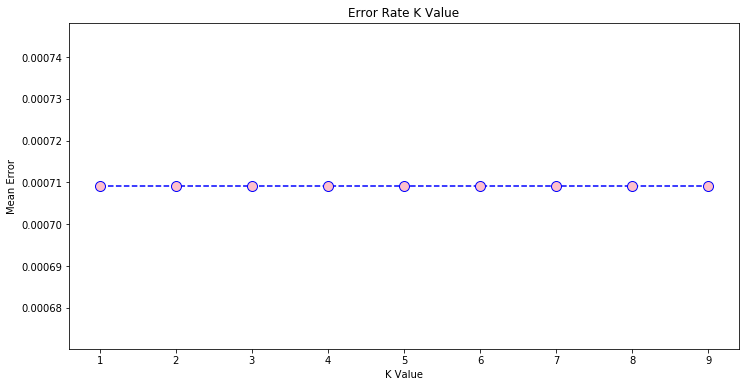

In [54]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 10), error, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='pink', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')